# Notebook activity A2.4  Exploring the properties of a white noise time series 

In this notebook activity you will simulate a time series that is generated by a white noise process, and will use correlograms to compare the intertemporal properties of a white noise process with some of the random walks from Notebook activity A2.3.

## (a) Getting started

Since we will be simulating our own series, we will not need to load any data at the outset. However we will load a package required for time series analysis, `tseries`, into the session. 

### (i)

To load the package, run the code cell below.

In [ ]:
library(tseries)

## (b) Simulating the data

We want to simulate data from a white noise process, which is a particularly simple type of time series. From Box 12 (Unit A2, Section 3.3), we know that a white noise process has i.i.d. observations and follows a normal distribution with zero mean and constant variance, i.e. the data are independent and have distribution

$Y_t\sim N(0,\sigma^2)$, $t=1,2,\ldots, T$.


In our example, we will simulate a white noise process with variance $\sigma^2=10$ over $T=200$ time periods.

### (i)

Run the code below to generate 200 observations of a white noise process with variance 1.

In [2]:
wn <- rnorm(200, mean = 0, sd = 10)

## (c) Plotting the time series

In Notebook activity A1.4 (and also in A2.2 and A2.3), you have seen how to plot a time series. In this notebook, we will use the `ts.plot()`, and not the `plot()` function to plot the time series. The main reason is so that the plot uses `Time` in the horizontal axis, which we obtained previously by defining our variables as time series variables (using the `ts()` function).

We will first plot the time series, and will then improve the layout of the plot.

### (i)

Run the code below to plot the white noise process `wn` against time.

In [ ]:
ts.plot(wn)

###  <a class="tocSkip">

Let's improve the layout of the plot. The $x$-axis is labelled 'Time' by default, but what about the $y$-axis?

* The name of the time series, `wn` here, is shown vertically to the left of the plot. We can remove this text by adding the argument `ylab = ""` to the plot command. (This option removes the label from the $y$-axis. To use a different label for the $y$-axis, you can insert it between the `''` signs.) 
* It may look nicer to give the plot an informative title instead. For example, we could title the plot 'White Noise'. This is achieved by adding the argument `main = "White Noise"` to the plot command.
* The lines in the plot may appear a bit thin. To produce thicker lines, the `lwd` argument can be used. For example, `lwd = 2` will produce lines that are twice as thick as the default lines.

Let's put this into action.

### (ii)

Run the code below to produce an improved version of the plot in part (i). 

In [ ]:
ts.plot(wn, main = "White Noise", ylab = "", lwd = 2)

### (iii)

What patterns do you observe from the time plot generated in part (ii)?

#### Solution <a class="tocSkip">

We can see that the values taken by the white noise series oscillate around a zero mean, with no discernible trend. They appear to be spread equally, which implies constant variance over time. Neither the mean nor the variance exhibit any time dependence.

## (d) Investigating the autocorrelation function

In this section, we will investigate the plot of the autocorrelation function, or correlogram, of our time series. 

You have seen how to create the correlogram in Notebook activities A2.1 and A2.2.

### (i)

Use the empty code cell below to plot the autocorrelation function of the simulated white noise series.

#### Solution <a class="tocSkip">

The required code is given below. 

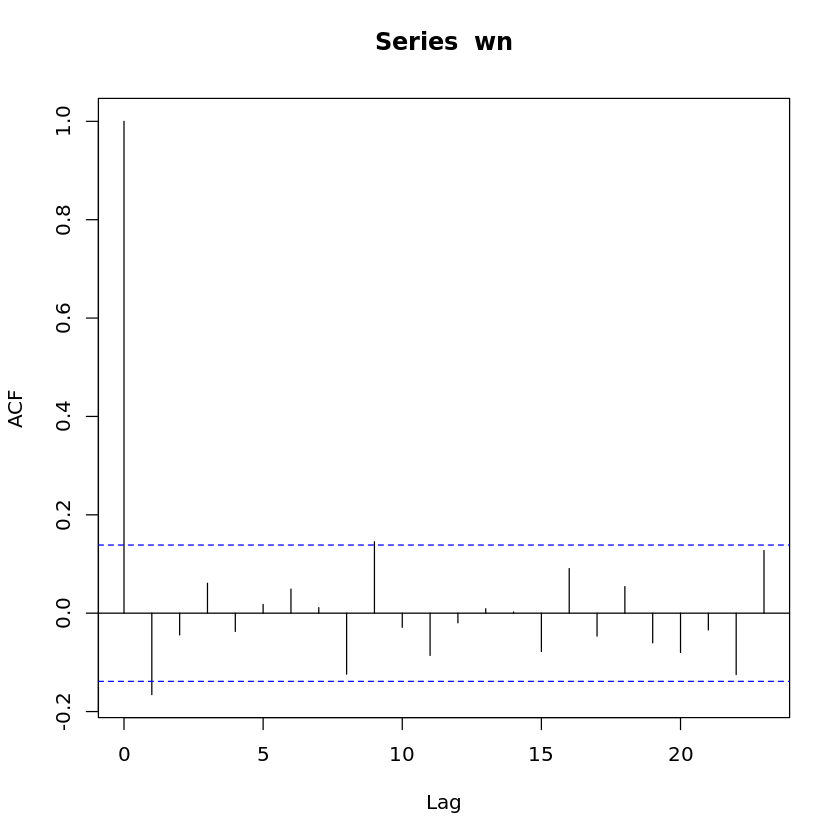

In [5]:
acf(wn)

### (ii)

Comment on the patterns that you observe in the correlogram obtained in part (i). Does the correlogram show evidence of persistence in the white noise series?

#### Solution <a class="tocSkip">

Note that because we have not set a seed, we may generate different time plots. But broadly, and after many attempts, we observe:
* The autocorrelation function falls from 1 at lag zero (since all variables are perfectly correlated with themselves) to near zero at the first lag and stays near zero for subsequent lags. 
* It is evident from the correlogram that the white noise series exhibits no persistence. There is no autoregressive term in the data generation process.
* The reason why this correlogram displays this pattern is that, by definition, all covariances of the white noise process are equal to 0. 

## (e) Creating random walks and plotting their autocorrelation functions

In this section, we will create random walks as in Notebook activity A2.3, so we can compare their correlograms to the correlogram of our white noise process. We will use the following types of random walks:

* Simple random walk
* Random walk with drift
* Random walk with drift and deterministic trend. 

We will assume the error terms follow the same distribution as the white noise's above.

### (i)

Run the code below to simulate one of each type of random walk discussed above. (The `set.seed()` command ensures everyone will create the same random walks, and hence the same correlograms.) 

In [6]:
# Initialize Random Number Generator
set.seed(15889) 
# Generate a series of random errors
e <- rnorm(50, mean = 0, sd = 10)

# Random walk as the cumulative sum of random errors 
# and assuming the initial value is zero
randomWalk <- ts(cumsum(e))


# Random walk with drift as cumulative sum of shocks
# We assume the drift is 22.5
d <- 22.5
# Assuming the initial value is zero
randomWalkDrift <- ts(cumsum(d + e))

# Random walk with drift and deterministic trend as cumulative sum of shocks
# We assume the deterministic trend is 1
beta <- 1
# Assuming the initial value is zero and that time runs from t = 1 to t = 50
randomWalkDriftTrend <- ts(cumsum(d + beta*c(1:50) + e))
# Note here c(1:50) is a concise way of writing the vector c(1, 2, ..., 49, 50)


### (ii)

Use the code cell below to plot the respective autocorrelation functions of the three random walks you have simulated in part (i). 

#### Solution <a class="tocSkip">

The required code, and the corresponding output, are given below. 

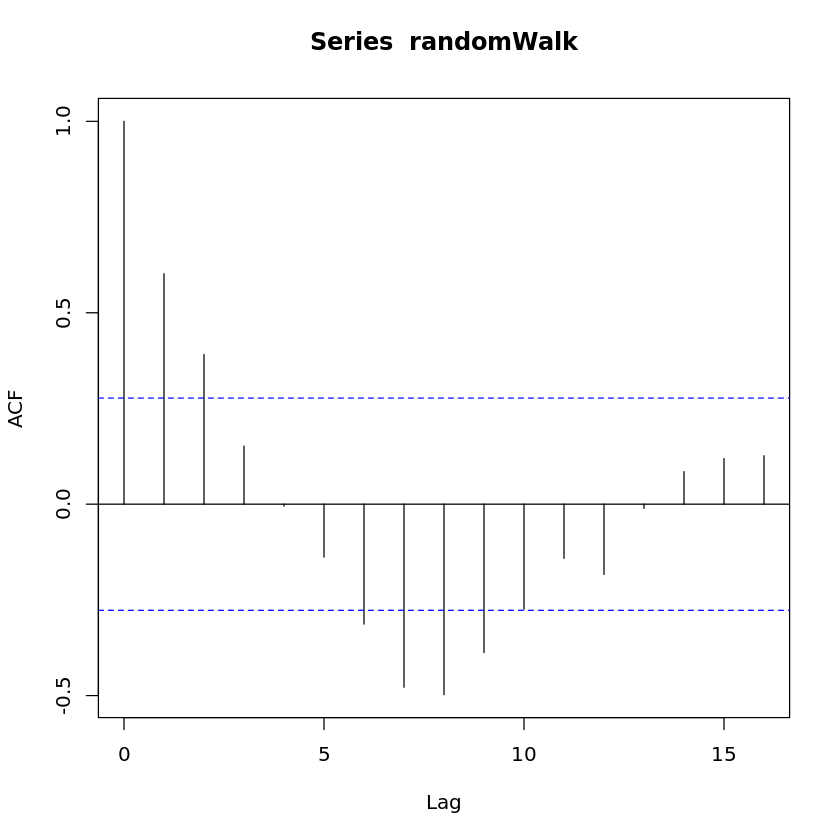

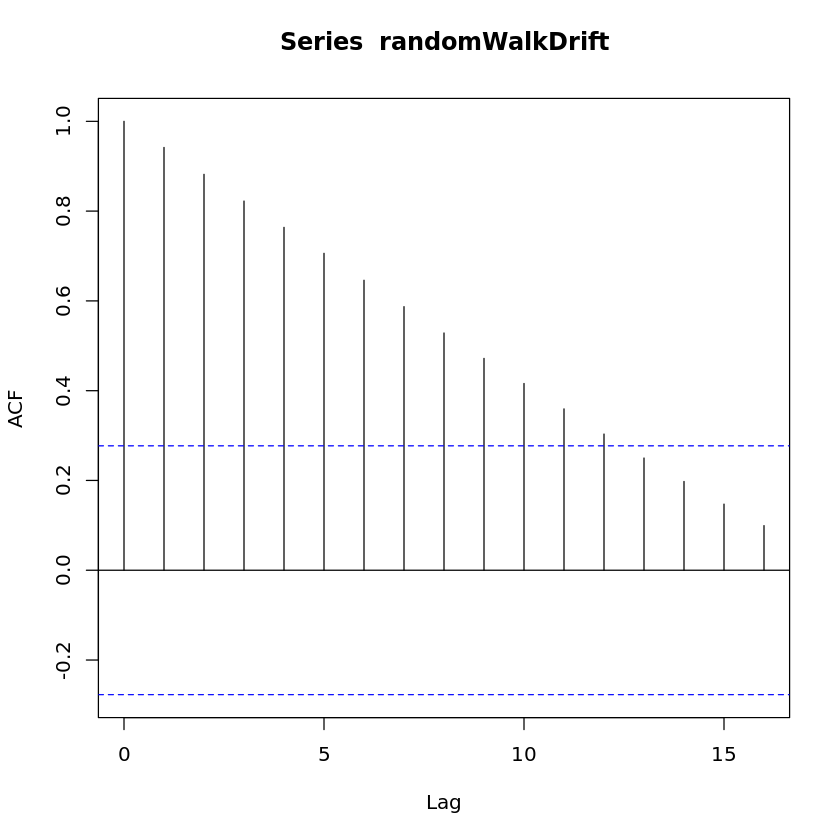

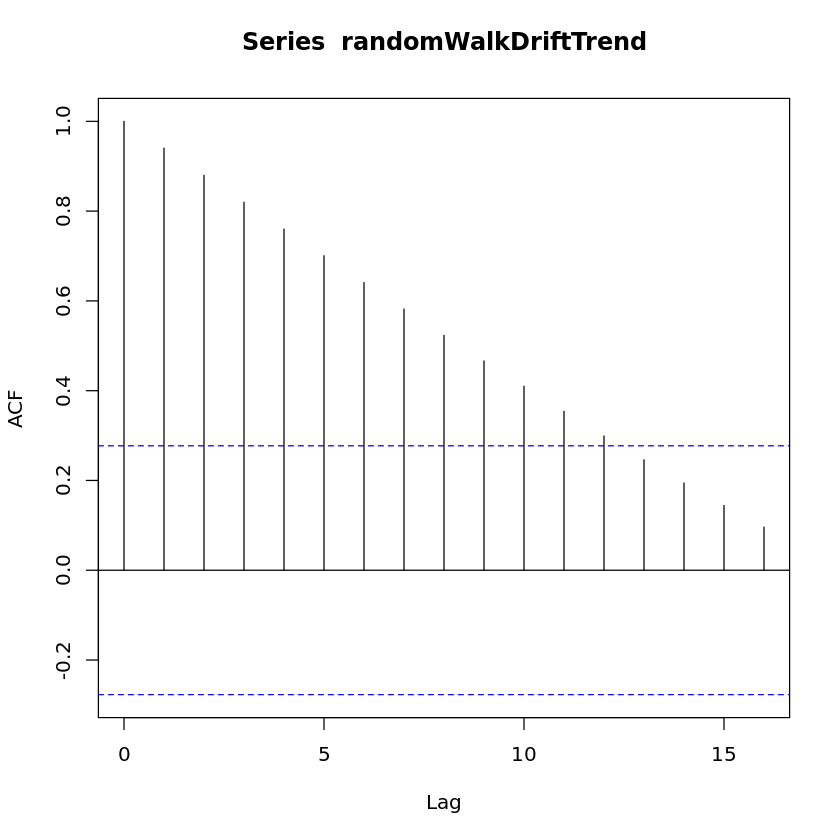

In [7]:
acf(randomWalk)
acf(randomWalkDrift)
acf(randomWalkDriftTrend)

## (f) Comparing the autocorrelation functions

### (i)

Describe the plots of the autocorrelation functions you obtained in part (e). Pay particular attention to how the plots differ. 
Then explain how they differ from the plot in part (d).

#### Solution <a class="tocSkip">

* The autocorrelation functions for all random walks diminish slowly with each lag. The decline to zero is very similar for both random walks with drift whereas the autocorrelation function for the simple random walk appears to oscillate around zero.
* This is in sharp contrast with the ACF of the white noise, which went down to effectively zero after lag 1.

## (g) Finishing off

In conclusion, a time series of a white noise not only displays constant variance and zero mean, but also has no persistence. In contrast, random walks and time-trended data have increasing variance, high persistence and, hence, display stronger autocorrelations. Plotting ACFs for a time series is often the first step towards modelling its properties. 